In [1]:
import tensorflow as tf
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dataset = 'C:/chinna/DATASETS/bulray/blur/train'
test_dataset = 'C:/chinna/DATASETS/bulray/blur/test'
val_dataset = 'C:/chinna/DATASETS/bulray/blur/valid'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_val_datagen = ImageDataGenerator(rescale = 1./225)

In [4]:
Img_Size = (224, 224)
Batch_Size = 32;


train_generator = train_datagen.flow_from_directory(
    train_dataset,
    target_size = Img_Size,
    batch_size = Batch_Size,
    class_mode = 'sparse'
)

val_generator = test_val_datagen.flow_from_directory(
    val_dataset,
    target_size = Img_Size,
    batch_size = Batch_Size,
    class_mode = 'sparse'
)

class_names = list(train_generator.class_indices.keys())
print("Classes : ",class_names)

Found 10482 images belonging to 6 classes.
Found 1314 images belonging to 6 classes.
Classes :  ['bird', 'bus', 'car', 'cat', 'dog', 'truck']


In [5]:
%store class_names

Stored 'class_names' (list)


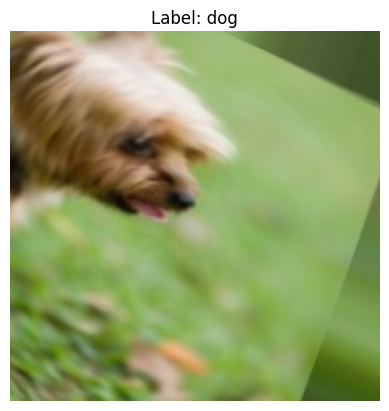

In [6]:
import matplotlib.pyplot as plt 

images, labels = next(train_generator)

plt.imshow(images[0])
plt.title(f"Label: {class_names[int(labels[0])]}")
plt.axis('off')
plt.show()


In [7]:
# Transfer Learning Using MobileNetV2


from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation="softmax")(x)

model = Model(inputs, outputs)


model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:


history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=10,
)


c:\Users\meher\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/328 ━━━━━━━━━━━━━━━━━━━━ 1:53 743ms/step - accuracy: 0.5400 - loss: 1.2065

In [ ]:
model.save('models/TL_MobileNetV2.h5')

VGG16 TRANSFER LEARNING

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


inputs = Input(shape = (224, 224, 3))

h = layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
h = layers.MaxPooling2D(2, 2)(h)

h = layers.Conv2D(64, (3, 3), activation = 'relu')(h)
h = layers.MaxPooling2D(2,2)(h)

h = layers.Conv2D(128, (3,3), activation = 'relu')(h)
h = layers.MaxPooling2D(2,2)(h)

h = layers.GlobalAveragePooling2D()(h)
h = layers.Dense(256, activation = 'relu')(h)
h = layers.Dropout(0.5)(h)

outputs = layers.Dense(6, activation = 'softmax')(h)
model3 = Model(inputs = inputs, outputs = outputs)

model3.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,814 (499.27 KB)

 Trainable params: 127,814 (499.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

history = model3.fit(
    train_generator,
    validation_data = val_generator,
    epochs=5,
)


Epoch 1/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 267s 806ms/step - accuracy: 0.2589 - loss: 1.6653 - val_accuracy: 0.3387 - val_loss: 1.6030
Epoch 2/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 256s 780ms/step - accuracy: 0.3537 - loss: 1.5205 - val_accuracy: 0.3623 - val_loss: 1.4716
Epoch 3/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 269s 820ms/step - accuracy: 0.3833 - loss: 1.4429 - val_accuracy: 0.4072 - val_loss: 1.3623
Epoch 4/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 266s 811ms/step - accuracy: 0.4077 - loss: 1.3934 - val_accuracy: 0.4193 - val_loss: 1.3378
Epoch 5/5
328/328 ━━━━━━━━━━━━━━━━━━━━ 260s 792ms/step - accuracy: 0.4216 - loss: 1.3437 - val_accuracy: 0.4521 - val_loss: 1.2613


In [ ]:
model3.save('models/simple_cnn.h5')

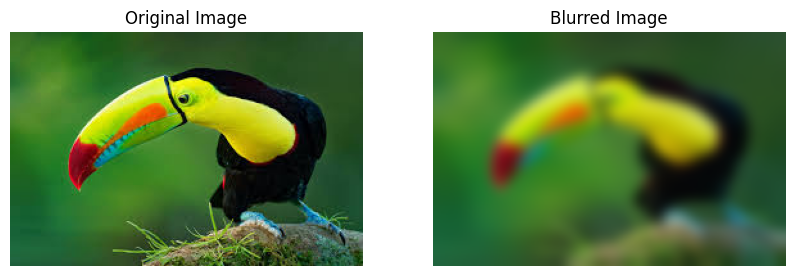

True

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image (OpenCV loads in BGR format)
image = cv2.imread("bird1.jpg")

# Apply Gaussian Blur
blurred_image1 = cv2.GaussianBlur(image, (31, 31), 0)

# Convert BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_rgb = cv2.cvtColor(blurred_image1, cv2.COLOR_BGR2RGB)

# Display original and blurred side-by-side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_rgb)
plt.title("Blurred Image")
plt.axis("off")

plt.show()

# Save blurred image
cv2.imwrite("blurred_output1.jpg", blurred_image1)


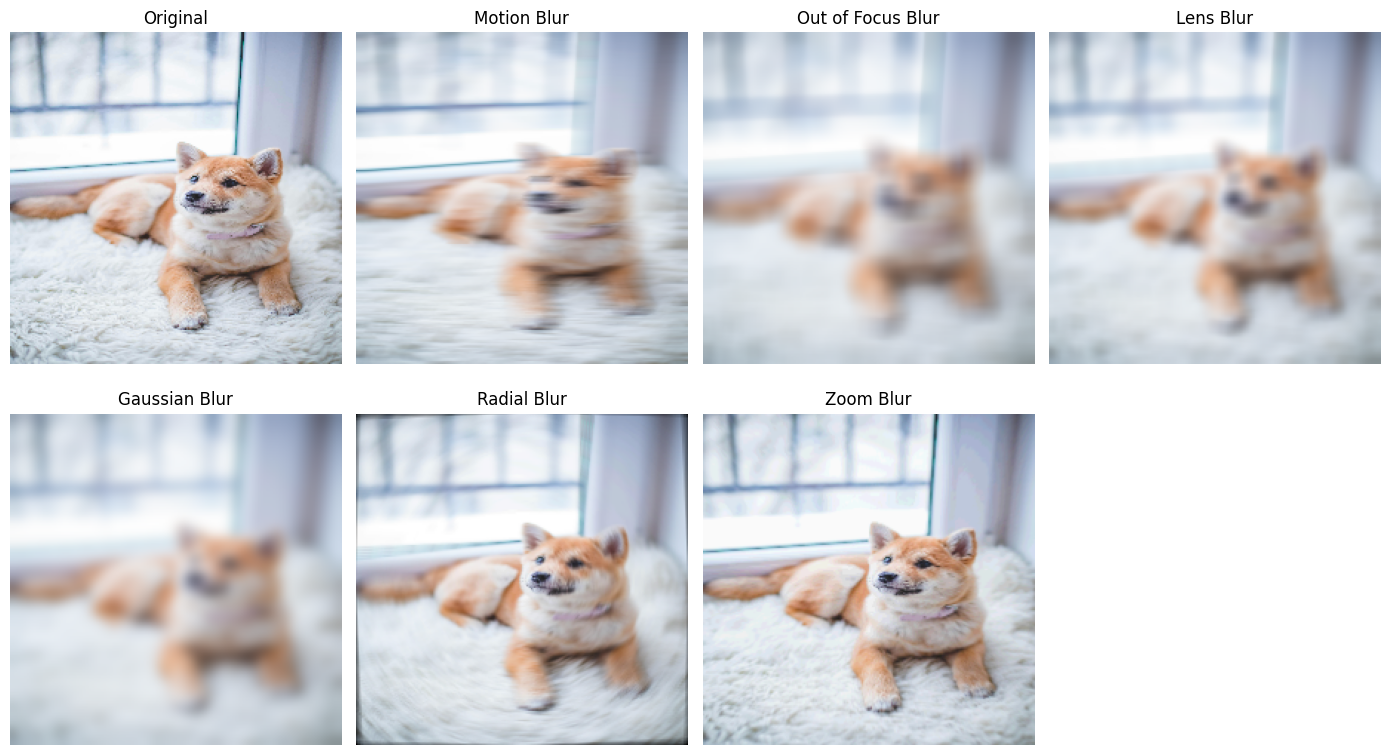

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Blur Functions
# ===============================
def motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    return cv2.filter2D(img, -1, kernel)

def out_of_focus_blur(img, ksize=15):
    return cv2.GaussianBlur(img, (ksize, ksize), sigmaX=10)

def lens_blur(img, radius=5):
    # Approximated using Gaussian blur with small kernel
    return cv2.GaussianBlur(img, (radius * 2 + 1, radius * 2 + 1), sigmaX=radius)

def gaussian_blur(img, ksize=25):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def radial_blur(img, strength=5):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    result = np.zeros_like(img)
    for i in range(1, strength+1):
        M = cv2.getRotationMatrix2D(center, i - strength / 2, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        result = cv2.addWeighted(result, 1.0, rotated, 1.0 / strength, 0)
    return result

def zoom_blur(img, zoom_factor=1.02, steps=10):
    h, w = img.shape[:2]
    center_x, center_y = w // 2, h // 2
    result = np.zeros_like(img)
    for i in range(steps):
        M = cv2.getRotationMatrix2D((center_x, center_y), 0, zoom_factor - (i * 0.002))
        zoomed = cv2.warpAffine(img, M, (w, h))
        result = cv2.addWeighted(result, 1.0, zoomed, 1.0 / steps, 0)
    return result

# ===============================
# Apply All Blurs
# ===============================
def apply_all_blurs(img):
    return {
        "Original": img,
        "Motion Blur": motion_blur(img),
        "Out of Focus Blur": out_of_focus_blur(img),
        "Lens Blur": lens_blur(img),
        "Gaussian Blur": gaussian_blur(img),
        "Radial Blur": radial_blur(img),
        "Zoom Blur": zoom_blur(img)
    }

# ===============================
# Main Execution
# ===============================
# Load image
image = cv2.imread("C:/Users/meher/Downloads/dog.jpg")
image = cv2.resize(image, (224, 224))

# Apply blurs
blurs = apply_all_blurs(image)

# Convert to RGB for display
blurs_rgb = {name: cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for name, img in blurs.items()}

# Display all
plt.figure(figsize=(14, 8))
for i, (name, img) in enumerate(blurs_rgb.items(), 1):
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [16]:
import cv2
import numpy as np
import os
import random
from glob import glob
from PIL import Image

# ===============================
# Safe Image Reader
# ===============================
def safe_read_image(path):
    """Read image using Pillow (handles special chars & bad encodings)."""
    try:
        img = Image.open(path).convert("RGB")   # Open with Pillow
        return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)  # Convert to OpenCV BGR
    except Exception as e:
        print(f"⚠️ Could not open {path}: {e}")
        return None

# ===============================
# Blur Functions
# ===============================
def motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    return cv2.filter2D(img, -1, kernel)

def out_of_focus_blur(img, ksize=15):
    return cv2.GaussianBlur(img, (ksize, ksize), sigmaX=10)

def lens_blur(img, radius=5):
    return cv2.GaussianBlur(img, (radius * 2 + 1, radius * 2 + 1), sigmaX=radius)

def gaussian_blur(img, ksize=25):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def radial_blur(img, strength=5):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    result = np.zeros_like(img)
    for i in range(1, strength + 1):
        M = cv2.getRotationMatrix2D(center, i - strength / 2, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        result = cv2.addWeighted(result, 1.0, rotated, 1.0 / strength, 0)
    return result

def zoom_blur(img, zoom_factor=1.02, steps=10):
    h, w = img.shape[:2]
    center_x, center_y = w // 2, h // 2
    result = np.zeros_like(img)
    for i in range(steps):
        M = cv2.getRotationMatrix2D((center_x, center_y), 0, zoom_factor - (i * 0.002))
        zoomed = cv2.warpAffine(img, M, (w, h))
        result = cv2.addWeighted(result, 1.0, zoomed, 1.0 / steps, 0)
    return result

blur_functions = {
    "Motion_Blur": motion_blur,
    "OutOfFocus_Blur": out_of_focus_blur,
    "Lens_Blur": lens_blur,
    "Gaussian_Blur": gaussian_blur,
    "Radial_Blur": radial_blur,
    "Zoom_Blur": zoom_blur
}

# ===============================
# Dataset Preparation
# ===============================
source_directory = r"C:\chinna\DATASETS\bulray\raw\truck"   # input folder with ~2000 images
output_root = r"C:\chinna\DATASETS\bulray\raw\_datasets\truck"

splits = {"train": 0.8, "test": 0.1, "valid": 0.1}

# Make output dirs
for split in splits.keys():
    os.makedirs(os.path.join(output_root, split, "truck"), exist_ok=True)

# Get all images
valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".JPG", ".JPEG", ".PNG")
all_images = [f for f in glob(os.path.join(source_directory, "*")) if f.endswith(valid_exts)]

print(f"🔎 Found {len(all_images)} images in {source_directory}")

if not all_images:
    print("⚠️ No images found! Check your source_directory path and extensions.")
    exit()

# Shuffle images
random.shuffle(all_images)

# Split dataset
n_total = len(all_images)
n_train = int(n_total * splits["train"])
n_test = int(n_total * splits["test"])
n_valid = n_total - n_train - n_test

train_files = all_images[:n_train]
test_files = all_images[n_train:n_train + n_test]
valid_files = all_images[n_train + n_test:]

datasets = {"train": train_files, "test": test_files, "valid": valid_files}

# ===============================
# Process and Save
# ===============================
for split, files in datasets.items():
    print(f"\n📂 Processing {split} set ({len(files)} images)...")
    for idx, file in enumerate(files, 1):
        img = safe_read_image(file)
        if img is None:
            continue

        # Resize (to 352x352, you can change if needed)
        img = cv2.resize(img, (224, 224))

        # Random blur
        blur_name, blur_func = random.choice(list(blur_functions.items()))
        blurred_img = blur_func(img)

        # Save
        out_path = os.path.join(output_root, split, "truck", f"{idx}_{blur_name}.jpg")
        success = cv2.imwrite(out_path, blurred_img)

        if not success:
            print(f"❌ Failed to save: {out_path}")

print("\n✅ Done! Check:", output_root)


🔎 Found 2160 images in C:\chinna\DATASETS\bulray\raw\truck

📂 Processing train set (1728 images)...

📂 Processing test set (216 images)...

📂 Processing valid set (216 images)...

✅ Done! Check: C:\chinna\DATASETS\bulray\raw\_datasets\truck
